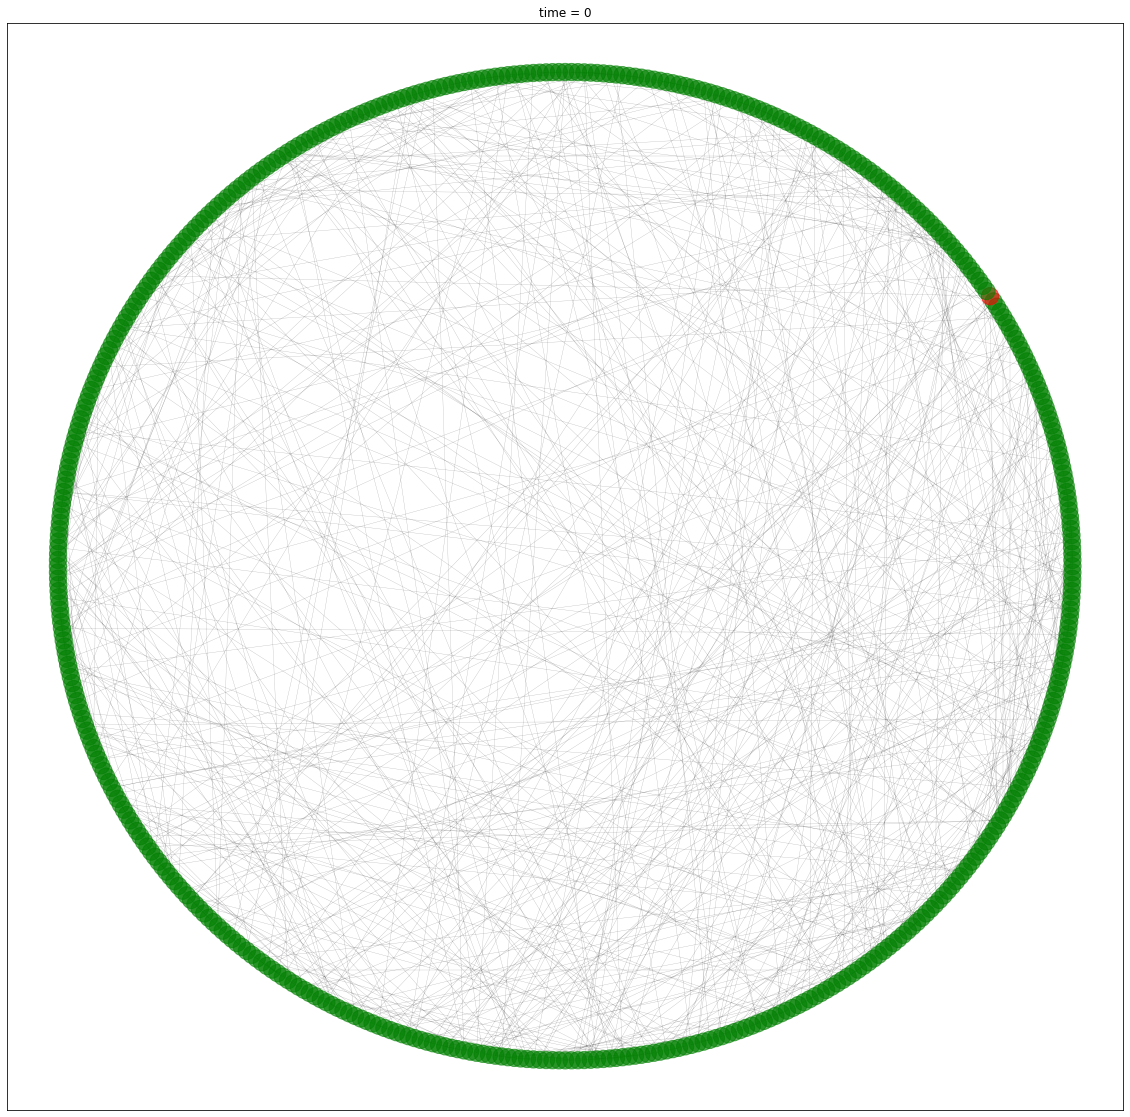

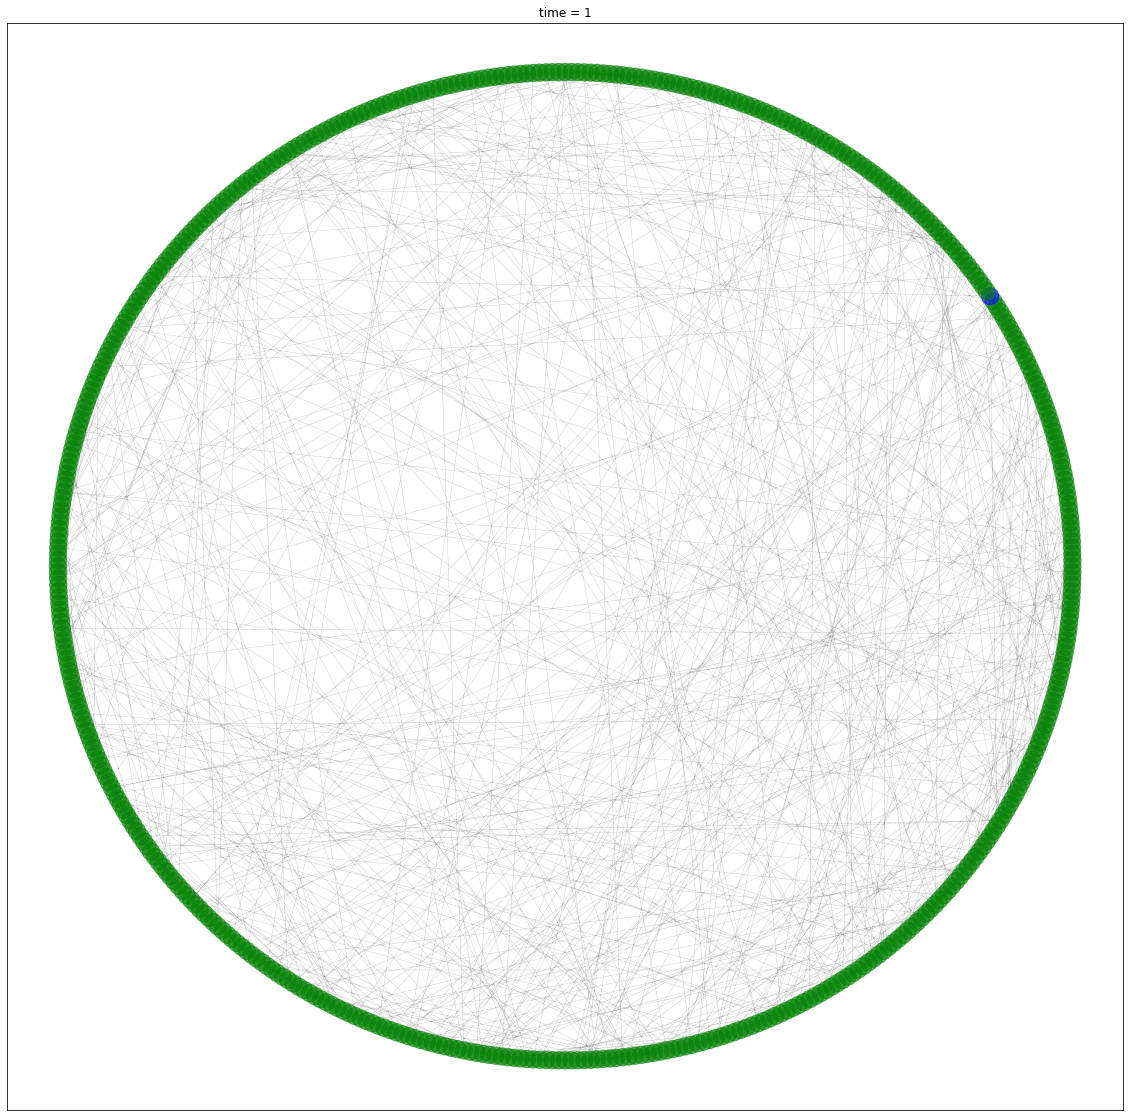

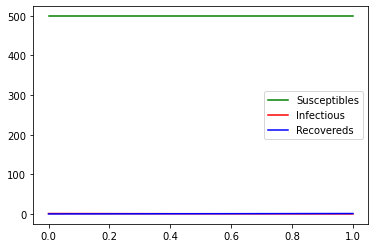

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

# 生成小世界网络
def small_world(N, d, a):
    random.seed(1024)
    A = np.zeros((N, N))

    for i in range(N):                          
        t = 0
        while t < (d/2):
            A[i][i-(t+1)] = 1
            A[i-(t+1)][i] = 1
            t += 1

    for i in range(N):  
        t = 0
        while t < (N/2):
            if A[i][i-(t+1)] == 1:        
                if random.random() < a:         
                    A[i][i-(t+1)] = 0                   
                    A[i-(t+1)][i] = 0
                    target = random.randint(0,(N-1))
                    while A[i][target] == 1 or target == i: 
                        target = random.randint(0,(N-1))
                    A[i][target] = 1                    
                    A[target][i] = 1
            t += 1
    return A

# 初始化零号病人
def patient_zero(N,num):
    Infecters = random.sample(range(N),num)
    InfectStatus = np.zeros(N,int)            
    for i in Infecters:
        InfectStatus[i] = 1                   
    return InfectStatus

# 感染过程
def infect(A, S, beta, gamma=0):        
    N = len(A)
    for i in range(N):
        if S[i] == 1 and random.random() <= gamma:
            S[i] = 2
 
    if sum(S==1) < N/2:                 
        for i in range(N):               
            if S[i] == 1:
                for j in range(N):
                    if A[i][j] == 1 and S[j] == 0 and random.random() <= beta:
                        S[j] = 1        
    else:
        for i in range(N):
            if S[i] == 0:
                for j in range(N):
                    if A[i][j] == 1 and S[j] == 1 and random.random() <= beta:
                        S[i] = 1
    return S

# 网络中的 SIR 过程
def SIR(A, N0, Beta, Gamma, plot=True):
    N = len(A)
    S = patient_zero(N, N0)
    
    if plot:
        g = nx.from_numpy_matrix(A)
        pos = nx.circular_layout(g)
        nodesize = []
        maxsize = 10
        minsize = 1
        maxdegree = np.max(np.sum(A,axis=0))
        mindegree = np.min(np.sum(A,axis=0))
        if maxdegree == mindegree:
            nodesize = [minsize for i in range(len(A))]
        else:
            for node in g:
                size = (np.sum(A[node]) - mindegree)/(maxdegree-mindegree)*(maxsize-minsize)+minsize 
                nodesize.append(size)

    result = []
    time = 0
    while True:
        if plot:
            cmap = ['g', 'r', 'b']
            colors = [cmap[s] for s in S]
            plt.figure(figsize=(20,20))
            
            nx.draw_networkx_nodes(g, pos=pos , node_color=colors, alpha=0.6)
            nx.draw_networkx_edges(g, pos=pos , width=0.3 , alpha=0.3)
            plt.title('time = {}'.format(time))
            #plt.savefig('{}.png'.format(str(time).zfill(4)))
            plt.show()
            plt.pause(0.1)
    
        result.append((sum(S==0), sum(S==1), sum(S==2)))
        if sum(S==1) == N or sum(S==1) == 0:
            break
        
        S = infect(A, S, Beta, Gamma) 
        time += 1
    
    return np.array(result)

# 主程序
C = small_world(500,4,0.5)    
result = SIR(C,1,0.5,1.0,plot=True)
plt.plot(result[:,0], 'g', label='Susceptibles')
plt.plot(result[:,1], 'r', label='Infectious')
plt.plot(result[:,2], 'b', label='Recovereds')
plt.legend()